In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
# Loading Foreign Exchange Dataset
data = pd.read_csv('exchange.csv')

#### Starts off with Foreign Exchange dataset being loaded from the CSV file listed on :

#### https://www.kaggle.com/brunotly/foreign-exchange-rates-per-dollar-20002019 . 

#### It includes datapoints of exchange rates compared to the U.S. dollar several for countries including Singapore, Brazil, Japan and New Zealand. 

In [4]:
# Display of variety of datapoints in "results.csv"
data.tail

<bound method NDFrame.tail of       Unnamed: 0  Time Serie Australia    Euro New_Zealand United_Kingdom  \
0              0  2000-01-03    1.5172  0.9847      1.9033         0.6146   
1              1  2000-01-04    1.5239    0.97      1.9238         0.6109   
2              2  2000-01-05    1.5267  0.9676      1.9339         0.6092   
3              3  2000-01-06    1.5291  0.9686      1.9436          0.607   
4              4  2000-01-07    1.5272  0.9714       1.938         0.6104   
...          ...         ...       ...     ...         ...            ...   
5212        5212  2019-12-25        ND      ND          ND             ND   
5213        5213  2019-12-26    1.4411  0.9007      1.5002         0.7688   
5214        5214  2019-12-27    1.4331  0.8949      1.4919         0.7639   
5215        5215  2019-12-30    1.4278  0.8915      1.4846          0.761   
5216        5216  2019-12-31    1.4225  0.8907      1.4826         0.7536   

      Brazil  Canada   China Hong_Kong  ... S

In [5]:
# Reducing the number of datapoints, dropping ones which wouldn't improve results. 
# Also clearing rows with any empty fields or 'ND' in the row. 

data = data[~data['Euro'].isin(['ND'])]
data = data.drop(data.columns[0], axis=1)

# Dropped extra initial column. 

data = data.dropna()
data.shape
data.tail


<bound method NDFrame.tail of       Time Serie Australia    Euro New_Zealand United_Kingdom  Brazil  Canada  \
0     2000-01-03    1.5172  0.9847      1.9033         0.6146   1.805  1.4465   
1     2000-01-04    1.5239    0.97      1.9238         0.6109  1.8405  1.4518   
2     2000-01-05    1.5267  0.9676      1.9339         0.6092   1.856  1.4518   
3     2000-01-06    1.5291  0.9686      1.9436          0.607    1.84  1.4571   
4     2000-01-07    1.5272  0.9714       1.938         0.6104   1.831  1.4505   
...          ...       ...     ...         ...            ...     ...     ...   
5211  2019-12-24    1.4445  0.9022      1.5058         0.7719  4.0833   1.316   
5213  2019-12-26    1.4411  0.9007      1.5002         0.7688  4.0602  1.3124   
5214  2019-12-27    1.4331  0.8949      1.4919         0.7639  4.0507  1.3073   
5215  2019-12-30    1.4278  0.8915      1.4846          0.761  4.0152  1.3058   
5216  2019-12-31    1.4225  0.8907      1.4826         0.7536   4.019  1.2962  

Text(0, 0.5, 'Thailand')

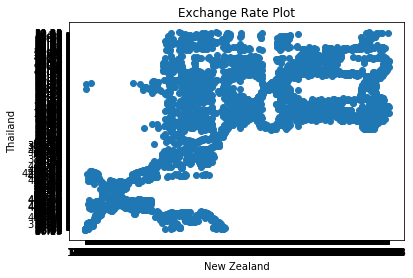

In [6]:
# Processing preliminary scatter plot, which includes New_Zealand and Thailand. 


plt.scatter(data.New_Zealand, data.Thailand)
plt.title('Exchange Rate Plot')
plt.xlabel('New Zealand')
plt.ylabel('Thailand')

In [9]:
# data = data.set_index('listing_active_count')
data.head(3)


,Time Serie,Australia,Euro,New_Zealand,United_Kingdom,Brazil,Canada,China,Hong_Kong,India,...,Singapore,Denmark,Japan,Malaysia,Norway,Sweden,Sri_Lanka,Switzerland,Taiwan,Thailand
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1


In [10]:
data.index


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5206, 5207, 5208, 5209, 5210, 5211, 5213, 5214, 5215, 5216],
           dtype='int64', length=5019)

In [11]:
data.columns

Index(['Time Serie', 'Australia', 'Euro', 'New_Zealand', 'United_Kingdom',
       'Brazil', 'Canada', 'China', 'Hong_Kong', 'India', 'Korea', 'Mexico',
       'South_Africa', 'Singapore', 'Denmark', 'Japan', 'Malaysia', 'Norway',
       'Sweden', 'Sri_Lanka', 'Switzerland', 'Taiwan', 'Thailand'],
      dtype='object')

In [12]:
 
data.plot(
    kind='hexbin',
    x='New_Zealand',
    y='Thailand',
    C='Malaysia',
    gridsize=20,
    figsize=(12,8),
    cmap="Greens", # defaults to greenish
    sharex=False # required to get rid of a bug
)

ValueError: hexbin requires x column to be numeric

In [13]:
# Remaining rows after filtering through data
data.head


<bound method NDFrame.head of       Time Serie Australia    Euro New_Zealand United_Kingdom  Brazil  Canada  \
0     2000-01-03    1.5172  0.9847      1.9033         0.6146   1.805  1.4465   
1     2000-01-04    1.5239    0.97      1.9238         0.6109  1.8405  1.4518   
2     2000-01-05    1.5267  0.9676      1.9339         0.6092   1.856  1.4518   
3     2000-01-06    1.5291  0.9686      1.9436          0.607    1.84  1.4571   
4     2000-01-07    1.5272  0.9714       1.938         0.6104   1.831  1.4505   
...          ...       ...     ...         ...            ...     ...     ...   
5211  2019-12-24    1.4445  0.9022      1.5058         0.7719  4.0833   1.316   
5213  2019-12-26    1.4411  0.9007      1.5002         0.7688  4.0602  1.3124   
5214  2019-12-27    1.4331  0.8949      1.4919         0.7639  4.0507  1.3073   
5215  2019-12-30    1.4278  0.8915      1.4846          0.761  4.0152  1.3058   
5216  2019-12-31    1.4225  0.8907      1.4826         0.7536   4.019  1.2962  

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(data.driverId, data.position)
X_train, X_test, y_train, y_test = train_test_split(data.New_Zealand, data.Thailand, test_size=0.10)


In [15]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [16]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

In [17]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [18]:
# Have to recheck for first model error "unsupported operand type(s) for /: 'str' and 'int'"

knn.score(X_test,y_test)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [20]:
knn.predict([[2.4]])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [19]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=20, random_state=0)
rforest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [20]:
# So far, producing between 53 to 57% accuracy

rforest.score(X_test,y_test)

0.5636644149544413

In [21]:
rforest.predict([[2.4]])

array([44.20005833])